In [9]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn.svm import SVC
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics
from sklearn.metrics import confusion_matrix

In [41]:
df = pd.read_csv("winequality-red.csv")
df.head(10)
y = df['quality']
x = df.drop(['quality','density'],axis='columns')
x['citric acid'] = x['citric acid']*10
x['sulphates'] = x['sulphates']*10
x['total sulfur dioxide'] = x['total sulfur dioxide']/10
x['volatile acidity'] = x['volatile acidity']*10
x['chlorides'] = x['chlorides']*100
# x['citric acid'] = x['citric acid']*10
x.head(10)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,pH,sulphates,alcohol
0,7.4,7.0,0.0,1.9,7.6,11.0,3.4,3.51,5.6,9.4
1,7.8,8.8,0.0,2.6,9.8,25.0,6.7,3.20,6.8,9.8
2,7.8,7.6,0.4,2.3,9.2,15.0,5.4,3.26,6.5,9.8
3,11.2,2.8,5.6,1.9,7.5,17.0,6.0,3.16,5.8,9.8
4,7.4,7.0,0.0,1.9,7.6,11.0,3.4,3.51,5.6,9.4
5,7.4,6.6,0.0,1.8,7.5,13.0,4.0,3.51,5.6,9.4
6,7.9,6.0,0.6,1.6,6.9,15.0,5.9,3.30,4.6,9.4
7,7.3,6.5,0.0,1.2,6.5,15.0,2.1,3.39,4.7,10.0
8,7.8,5.8,0.2,2.0,7.3,9.0,1.8,3.36,5.7,9.5
9,7.5,5.0,3.6,6.1,7.1,17.0,10.2,3.35,8.0,10.5


In [57]:
x_train, x_test, y_train, y_test= train_test_split(x, y, test_size= 0.25, random_state=0)  
from sklearn.preprocessing import StandardScaler    
st= StandardScaler()    
x_train= st.fit_transform(x_train,y_train)    
x_test= st.transform(x_test)

In [110]:
from sklearn.neighbors import KNeighborsClassifier  
#minkowski is like eucledian only a way to find distance between two points
knn= KNeighborsClassifier(n_neighbors=8, metric='minkowski', p=5 )  
knn.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=8, p=5)

In [111]:
y_pred=knn.predict(x_test)  
y_pred

array([5, 5, 7, 5, 6, 5, 5, 6, 5, 6, 5, 5, 6, 6, 5, 7, 7, 5, 6, 5, 6, 5,
       6, 6, 5, 5, 5, 7, 5, 6, 7, 6, 6, 5, 6, 6, 5, 5, 6, 6, 5, 7, 6, 5,
       6, 5, 5, 6, 6, 6, 5, 6, 5, 7, 5, 5, 5, 5, 6, 6, 5, 5, 6, 6, 5, 6,
       5, 5, 6, 7, 5, 5, 5, 5, 6, 5, 6, 5, 5, 7, 5, 5, 6, 6, 6, 6, 5, 5,
       6, 5, 5, 5, 5, 5, 5, 5, 6, 5, 5, 6, 7, 6, 6, 7, 5, 5, 5, 5, 6, 5,
       7, 5, 6, 5, 5, 7, 5, 7, 5, 6, 5, 5, 5, 5, 6, 7, 5, 5, 5, 6, 5, 5,
       6, 5, 6, 5, 6, 5, 6, 5, 6, 6, 5, 5, 6, 5, 6, 7, 7, 6, 6, 6, 5, 6,
       5, 6, 5, 5, 6, 6, 6, 6, 6, 5, 6, 5, 6, 6, 5, 6, 5, 6, 5, 7, 7, 6,
       7, 6, 5, 5, 5, 7, 6, 6, 6, 6, 6, 6, 5, 7, 7, 5, 6, 5, 5, 5, 5, 5,
       5, 5, 5, 6, 6, 6, 5, 5, 5, 6, 6, 6, 6, 5, 5, 6, 5, 5, 6, 6, 6, 5,
       5, 5, 6, 6, 6, 6, 6, 6, 6, 5, 5, 6, 5, 5, 7, 6, 7, 7, 7, 6, 5, 6,
       5, 5, 6, 6, 5, 5, 5, 6, 5, 5, 5, 5, 5, 6, 5, 5, 5, 5, 5, 7, 6, 6,
       5, 5, 5, 5, 6, 6, 5, 6, 6, 6, 6, 6, 6, 5, 6, 7, 5, 7, 6, 6, 6, 5,
       5, 5, 7, 6, 6, 6, 6, 6, 5, 6, 6, 5, 5, 5, 6,

In [112]:
from sklearn import metrics 
from sklearn.metrics import accuracy_score
print("Accuracy",accuracy_score(y_test,y_pred))
cm= confusion_matrix(y_test, y_pred)  
print(cm)

Accuracy 0.57
[[  0   0   1   1   0   0]
 [  0   0   8   6   0   0]
 [  0   0 117  46   6   0]
 [  0   0  57  96  17   0]
 [  0   0   8  17  15   0]
 [  0   0   0   3   2   0]]


In [61]:
from sklearn.cluster import KMeans
km = KMeans(n_clusters=5)
km.fit(x)


KMeans(n_clusters=5)

In [62]:
km.cluster_centers_

array([[ 8.80750751e+00,  5.14436937e+00,  3.01996997e+00,
         2.48663664e+00,  8.42822823e+00,  7.02927928e+00,
         2.33333333e+00,  3.28777778e+00,  6.48858859e+00,
         1.05309560e+01, -2.22044605e-16],
       [ 8.08227848e+00,  5.23433544e+00,  2.68037975e+00,
         2.68765823e+00,  8.04272152e+00,  2.81867089e+01,
         7.54113924e+00,  3.32132911e+00,  6.50791139e+00,
         1.03604958e+01,  1.00000000e+00],
       [ 7.88481973e+00,  5.51565465e+00,  2.20588235e+00,
         2.36470588e+00,  8.05104364e+00,  1.60948767e+01,
         5.21176471e+00,  3.34519924e+00,  6.45521822e+00,
         1.03745098e+01,  2.00000000e+00],
       [ 8.37600000e+00,  5.35200000e+00,  5.20000000e+00,
         1.95600000e+00,  3.94360000e+01,  1.50800000e+01,
         5.16800000e+00,  3.07480000e+00,  1.16320000e+01,
         9.43600000e+00,  4.00000000e+00],
       [ 7.97846154e+00,  4.90923077e+00,  2.80153846e+00,
         3.98538462e+00,  9.26769231e+00,  4.51769231e+01,
  

In [63]:
km.labels_

array([0, 1, 2, ..., 1, 1, 2])

In [79]:
x['k mean predicted label']=km.labels_
labels = km.labels_
x.head(20)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,pH,sulphates,alcohol,k mean predicted label
0,7.4,7.00,0.0,1.9,7.6,11.0,3.4,3.51,5.6,9.4,0
1,7.8,8.80,0.0,2.6,9.8,25.0,6.7,3.20,6.8,9.8,1
2,7.8,7.60,0.4,2.3,9.2,15.0,5.4,3.26,6.5,9.8,2
3,11.2,2.80,5.6,1.9,7.5,17.0,6.0,3.16,5.8,9.8,2
4,7.4,7.00,0.0,1.9,7.6,11.0,3.4,3.51,5.6,9.4,0
5,7.4,6.60,0.0,1.8,7.5,13.0,4.0,3.51,5.6,9.4,2
6,7.9,6.00,0.6,1.6,6.9,15.0,5.9,3.30,4.6,9.4,2
7,7.3,6.50,0.0,1.2,6.5,15.0,2.1,3.39,4.7,10.0,2
8,7.8,5.80,0.2,2.0,7.3,9.0,1.8,3.36,5.7,9.5,0
9,7.5,5.00,3.6,6.1,7.1,17.0,10.2,3.35,8.0,10.5,2


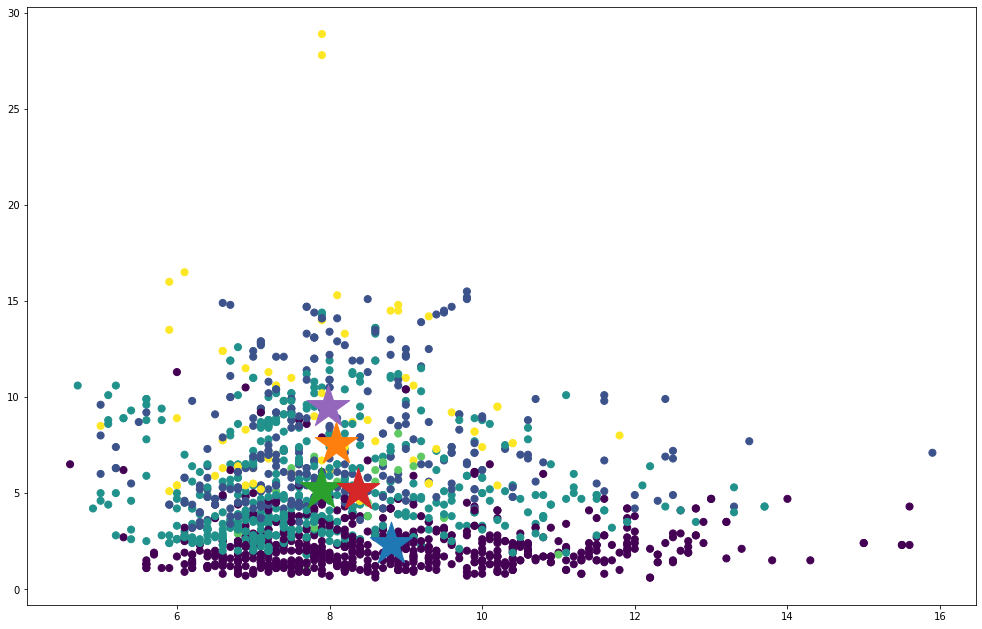

In [88]:
plt.rcParams['figure.figsize'] = (17,11)
plt.scatter(x['fixed acidity'],x['total sulfur dioxide'],50,labels)
for i in km.cluster_centers_:
    plt.scatter(i[0],i[6],2000,marker="*")

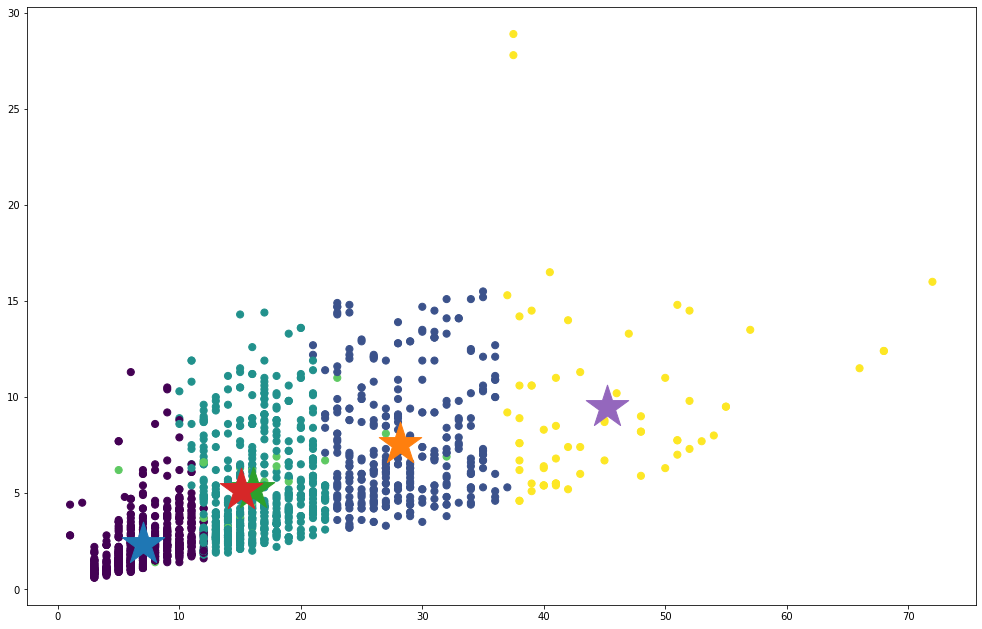

In [89]:
plt.rcParams['figure.figsize'] = (17,11)
plt.scatter(x['free sulfur dioxide'],x['total sulfur dioxide'],50,labels)
for i in km.cluster_centers_:
    plt.scatter(i[5],i[6],2000,marker="*")

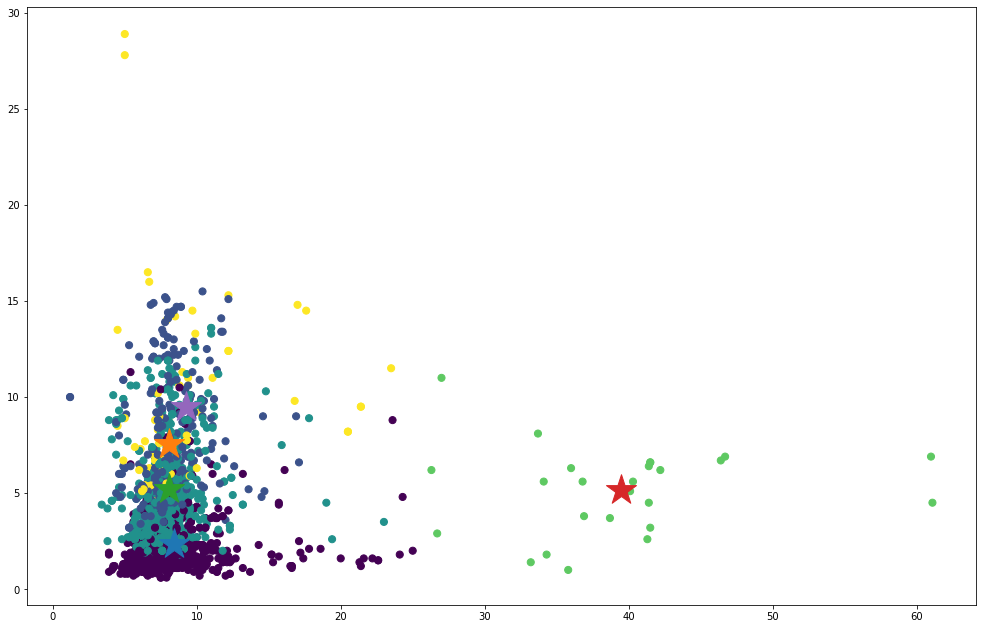

In [90]:
plt.rcParams['figure.figsize'] = (17,11)
plt.scatter(x['chlorides'],x['total sulfur dioxide'],50,labels)
for i in km.cluster_centers_:
    plt.scatter(i[4],i[6],1000,marker="*")

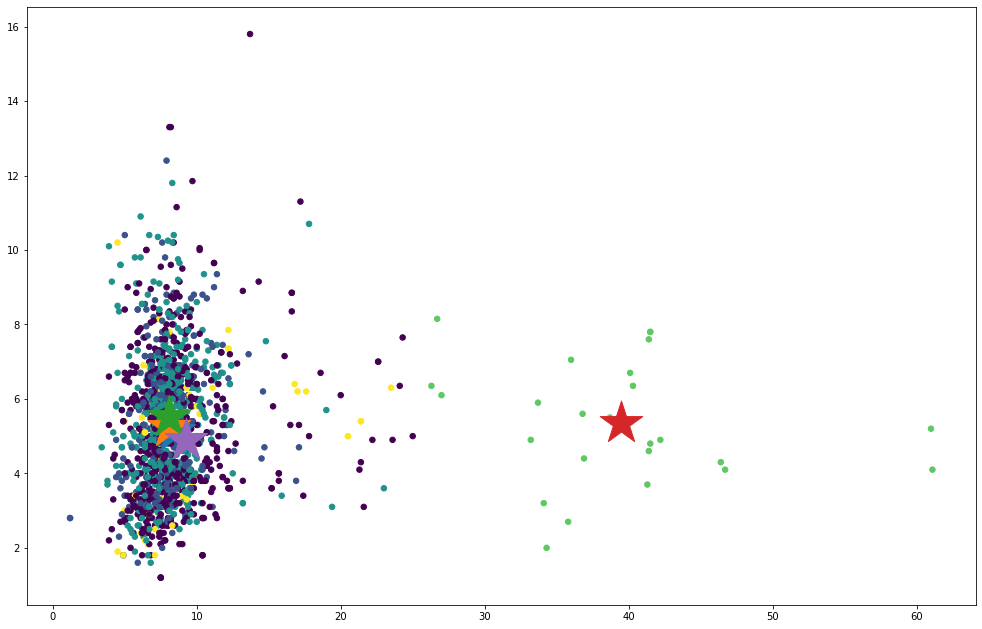

In [91]:
plt.rcParams['figure.figsize'] = (17,11)
plt.scatter(x['chlorides'],x['volatile acidity'],30,labels)
for i in km.cluster_centers_:
    plt.scatter(i[4],i[1],2000,marker="*")